Annotating images through lines, circles, rectangles, and text using opencv.

In [1]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0,9.0)
from IPython.display import Image

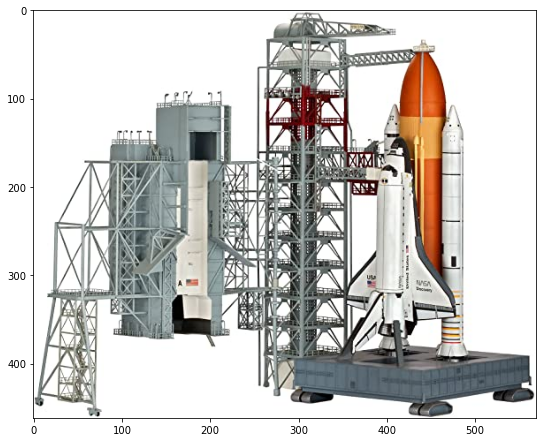

In [2]:
#Read image
img = cv2.imread("shuttle.jpg", cv2.IMREAD_COLOR)
#Display image
plt.imshow(img[:,:,::-1])

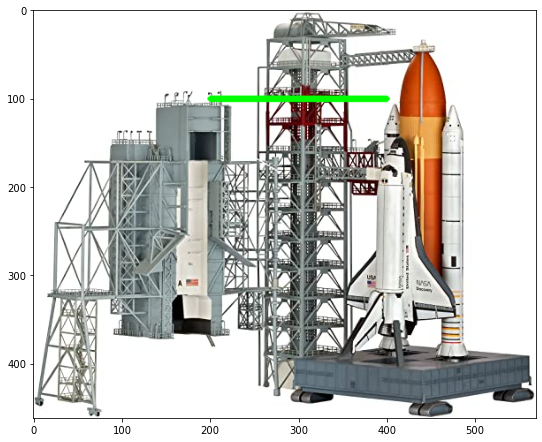

In [3]:
#Lets start off with drawing a line, we will use cv2.line function for this
imgLine = img.copy()
#we will start the line from (200,100) and will end at (400,100)
#The color of the line will be green
#Thickness of line will be 5px
#Line Type we will use is cv2.LINE_AA
cv2.line(imgLine, (200,100), (400,100), (0,255,0), thickness=5, lineType= cv2.LINE_AA)

#Display image
plt.imshow(imgLine[:,:,::-1])

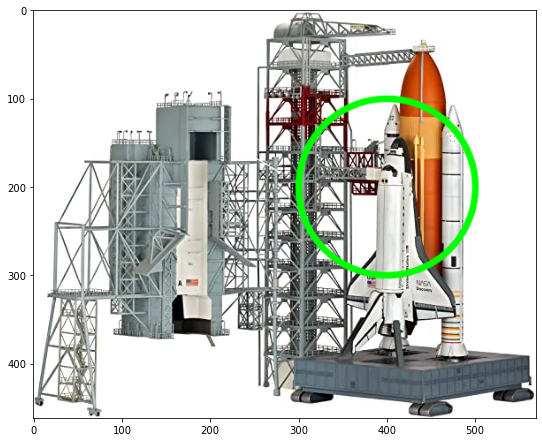

In [4]:
#Lets draw a circle now, we will use cv2.circle for this
imgCircle = img.copy()
cv2.circle(imgCircle, (400,200), 100, (0,255,0), thickness = 5, lineType=cv2.LINE_AA)
#Display Image
plt.imshow(imgCircle[:,:,::-1])

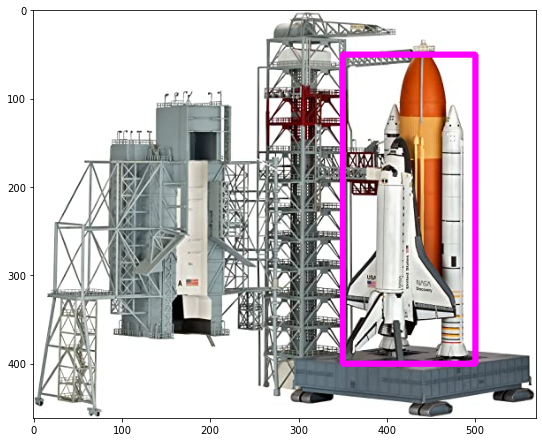

In [5]:
#Now lets draw a rectangle. we will use cv2.rectangle command
imgRect = img.copy()
cv2.rectangle(imgRect, (350,50), (500,400), (255,0,255), thickness=5, lineType =cv2.LINE_8)
#Display Image
plt.imshow(imgRect[:,:,::-1])

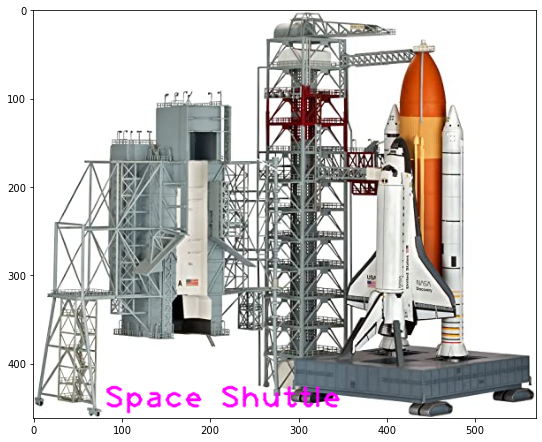

In [6]:
#Finally Adding text, for this we will use cv2.putText command
imgText = img.copy()
text = "Space Shuttle"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (255,0,255)
fontThickness = 2
cv2.putText(imgText,text,(80,450), fontFace, fontScale,fontColor,fontThickness, cv2.LINE_AA)
#display image
plt.imshow(imgText[:,:,::-1])

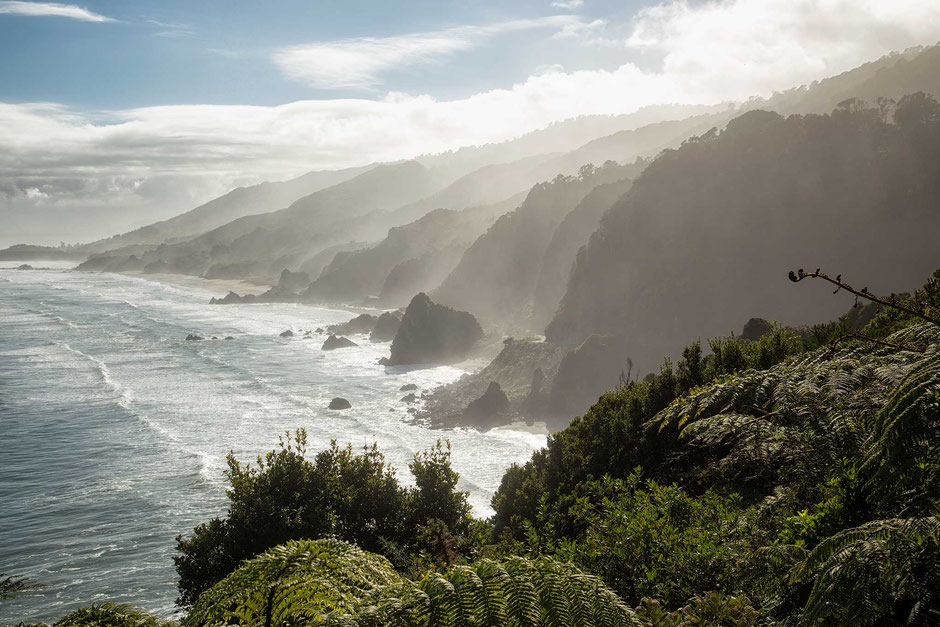

In [7]:
#Lets do some image enhancement using mathematical operations such as Arithematic operations, Thresholding and Masking, and Bitwise operations
img_bgr = cv2.imread("faraway.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#display image
Image(filename='faraway.jpg')

Text(0.5, 1.0, 'Brighter Image')

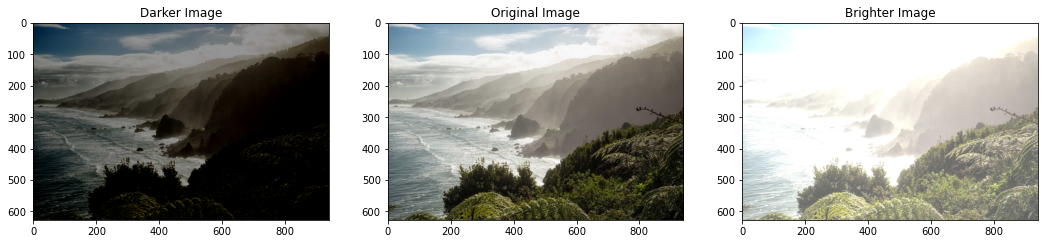

In [8]:
#Adding brightness to the image
matrix = np.ones(img_rgb.shape, dtype="uint8")*100

img_rgb_bright = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

#show images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);plt.title('Darker Image')
plt.subplot(132); plt.imshow(img_rgb); plt.title('Original Image')
plt.subplot(133); plt.imshow(img_rgb_bright); plt.title('Brighter Image')

Text(0.5, 1.0, 'High Contrast Image')

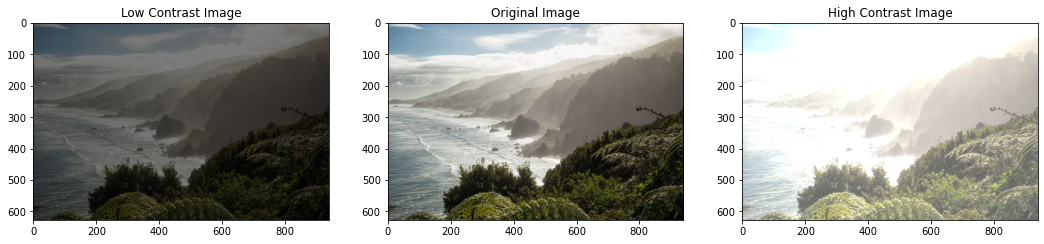

In [9]:
#Previously we added the pixels that lead to the change in brightness, now lets multiply the pixels. Multiplication  is correlated with the contrast of the image
matrix1 = np.ones(img_rgb.shape) * 0.5
matrix2 = np.ones(img_rgb.shape) * 1.5

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

#show images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);plt.title('Low Contrast Image')
plt.subplot(132); plt.imshow(img_rgb); plt.title('Original Image')
plt.subplot(133); plt.imshow(img_rgb_bright); plt.title('High Contrast Image')

(800, 1200)


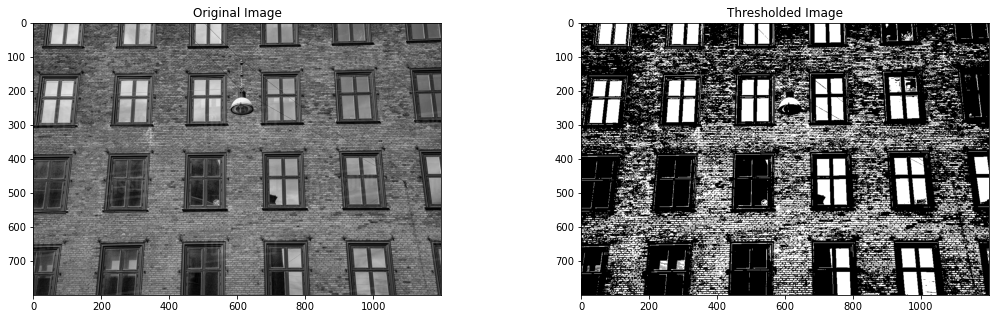

In [10]:
#Image Thresholding is a very important technique in computer vision and image processing
img_build = cv2.imread("build.jpg", cv2.IMREAD_GRAYSCALE)
tval, img_thresh = cv2.threshold(img_build, 120, 255, cv2.THRESH_BINARY)

#show images
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_build, cmap="gray");plt.title("Original Image")
plt.subplot(122); plt.imshow(img_thresh,cmap="gray");plt.title("Thresholded Image")

print(img_thresh.shape)

Text(0.5, 1.0, 'Thresholded Image (Adaptive)')

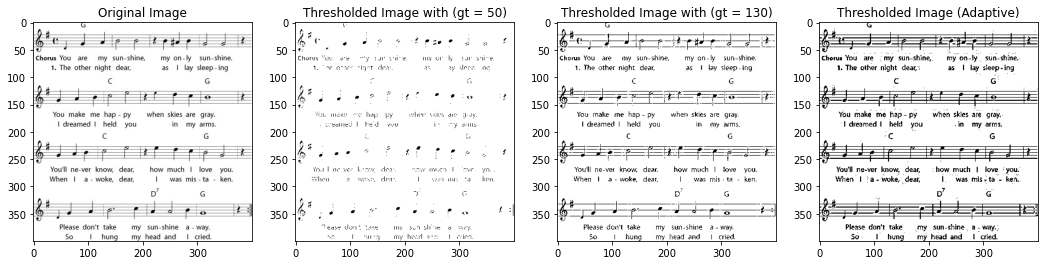

In [11]:
#Lets look at another example
img_piano = cv2.imread("pianosh.jpg", cv2.IMREAD_GRAYSCALE)
#perform thresholding
tval, img_thresh_glb1 = cv2.threshold(img_piano, 50, 255, cv2.THRESH_BINARY)
#perform thresholding with different values
tval, img_thresh_glb2 = cv2.threshold(img_piano, 130, 255, cv2.THRESH_BINARY)
#perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_piano, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

#show images
plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(img_piano, cmap="gray");plt.title("Original Image")
plt.subplot(142); plt.imshow(img_thresh_glb1, cmap = "gray"); plt.title("Thresholded Image with (gt = 50)");
plt.subplot(143); plt.imshow(img_thresh_glb2, cmap = "gray"); plt.title("Thresholded Image with (gt = 130)")
plt.subplot(144); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Thresholded Image (Adaptive)")

(352, 353)
(352, 353)


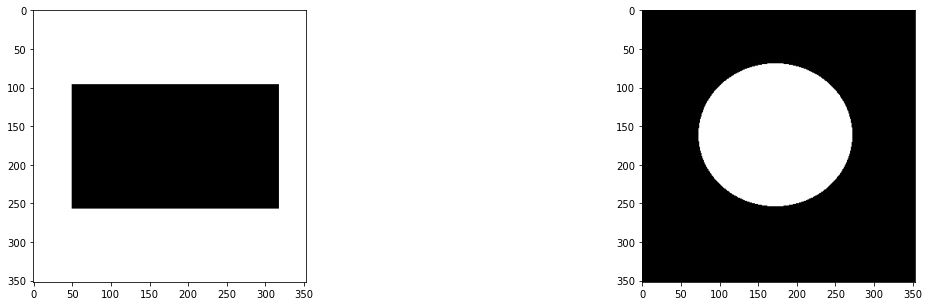

In [12]:
#Bitwise Operations
img_rec = cv2.imread("rect.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circ.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(img_rec, cmap="gray")
plt.subplot(122); plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)
print(img_cir.shape)
#make sure the size is same

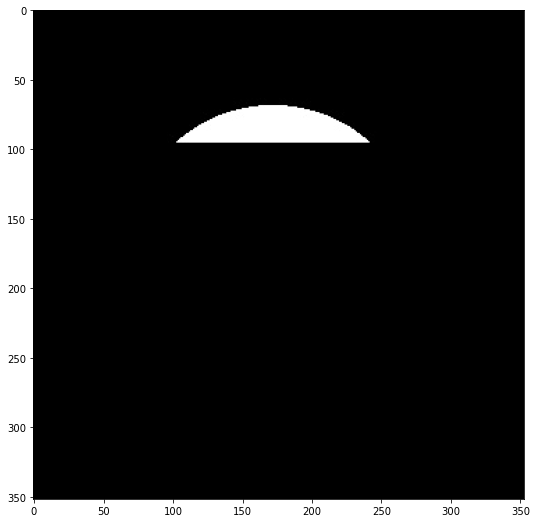

In [13]:
#Lets start with BITWISE AND Operator
res = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(res, cmap="gray")

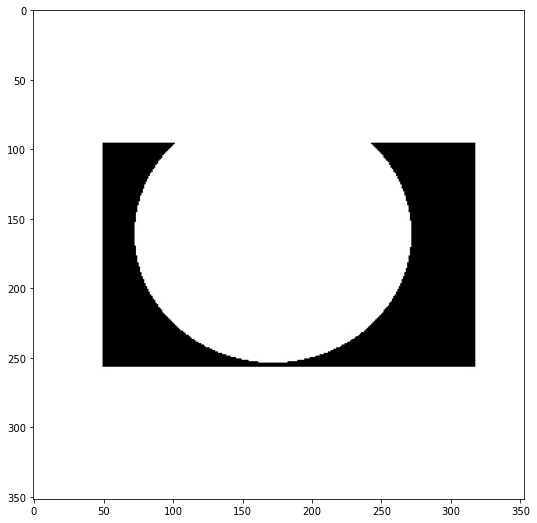

In [14]:
#Bitwise OR Operator
res = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(res, cmap="gray")

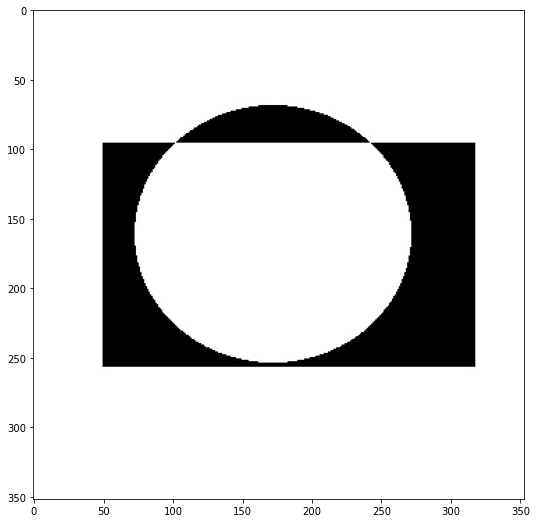

In [15]:
#Bitwise XOR operator
res = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(res, cmap="gray")

(745, 745, 3)


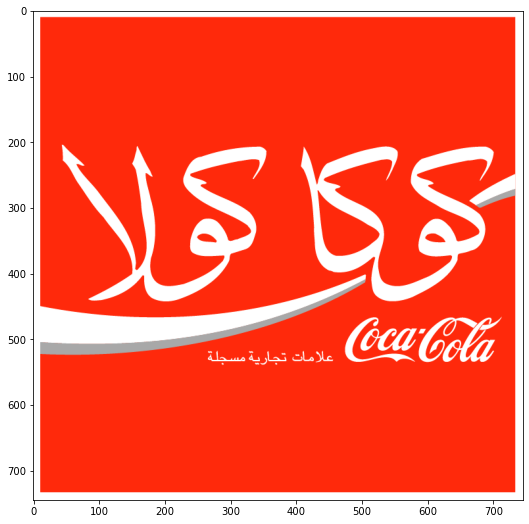

In [18]:
#Logo Manipulation
#First read foreground image
img_bgr = cv2.imread("coke.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
wlog = img_rgb.shape[0]
hlog = img_rgb.shape[1]

(745, 745, 3)


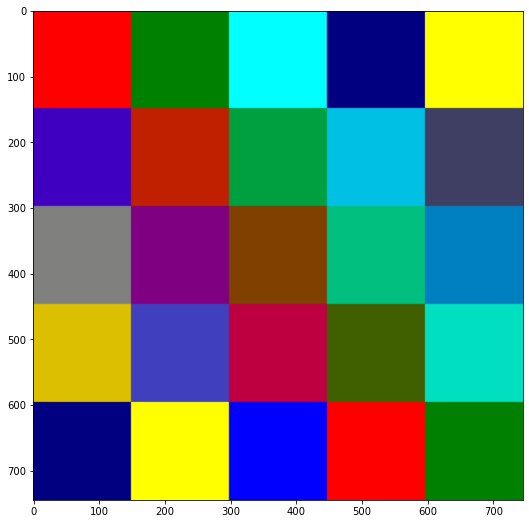

In [21]:
#Read the second image which will act as background
img_bg_bgr = cv2.imread("checker_color.png")
img_bg_rgb = cv2.cvtColor(img_bg_bgr,cv2.COLOR_BGR2RGB)

#set desired width and maintain the aspect ratio
aratio = wlog / img_bg_rgb.shape[1]
dim = (wlog, int(img_bg_rgb.shape[0]*aratio))

#Resize background image to same as logo image
img_bg_rgb = cv2.resize(img_bg_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_bg_rgb)
print(img_bg_rgb.shape)

(745, 745)


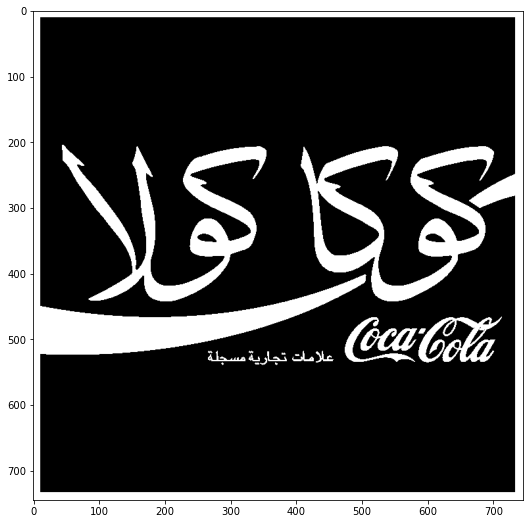

In [22]:
#create mask for logo image
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
#Apply global thresholding
tval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

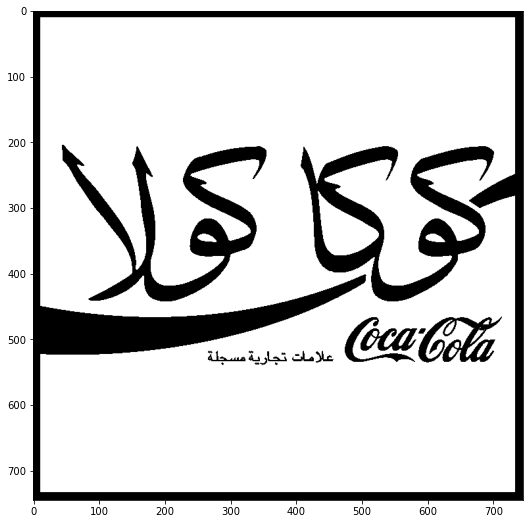

In [23]:
#create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

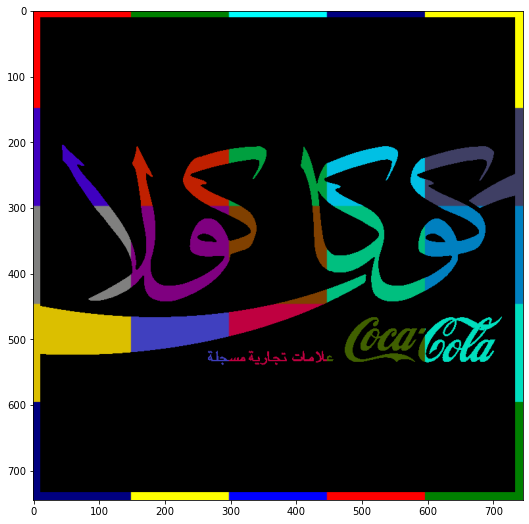

In [24]:
#apply background on the mask
#create colorful background behind the logo lettering
img_bground = cv2.bitwise_and(img_bg_rgb, img_bg_rgb, mask=img_mask)
plt.imshow(img_bground)

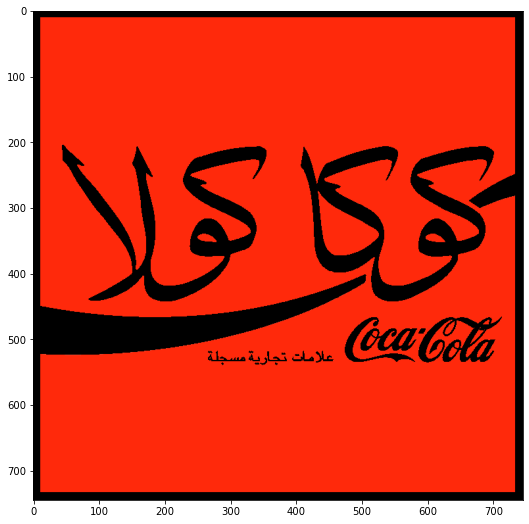

In [25]:
#Isolate foreground from image
#Isolate foreground (red from original image) using the inverse mask
img_fg = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_fg)

True

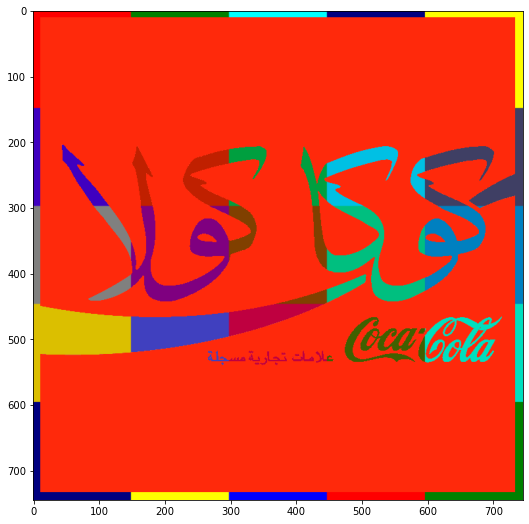

In [26]:
#Merge Foreground and Background
#Add two previous results to obtain the final one
res =cv2.add(img_bground, img_fg)
plt.imshow(res)
cv2.imwrite("final_logo.png",res[:,:,::-1]) #if you want to save the image